## 6장. 특징 기술(feature descript)

---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/descript1.PNG" width="600" height="750">


특징점, 관심점(interest point), 영역(area), edge 모두 특징(feature)이다.

하지만, 매칭에 사용하기에는 정보가 부족하다.

sift : 관심점 (x,y,스케일) , area : 연결요소 , edge: 에지맵, 에지강도 뿐이다.

---

- 기술자 (descriptor)

특징들의 주변 또는 내부를 들여다 보고 풍부한 정보를 추출하는 알고리즘.

여러개의 값으로 표현 되므로 <span style="color:blue">특징 벡터</span>라고도 한다.

<정보1, 정보2, 정보3...>

<br>
<br>

### 1. 특징 기술자의 조건
---



1. 기술자의 분별력



2. 다양한 변환에 불변(invariant)


- 상황에 맞는 기술자

- 불변과 공변

- 광도 불변성


3. 특징 벡터의 차원

차원이 낮을 수록 계산 효율을 높아진다.

<br>
<br>



### 2. 특징점을 위한 기술자
---

특징점은 해리스 코너 처럼 스케일 정보가 없는 특징은. <y,x>

해리스 라플라스나 SIFT는 스케일을 가지고 있어, <y,x,σ>

---

특징점들의 주변 또는 내부를 들여다 보고 풍부한 정보를 추출해야한다.

특징점에서 기술자를 추출하려면 (y,x)를 중심으로 윈도우를 씌우고 내부를 살펴보면된다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/interestpoint.PNG" width="500" height="500">

a와 b에 관심점이 검출되어, 21X21 윈도우를 씌우고 확대한 장면.

- (b) 그림:
카메라 이동만 발생하면, 윈도우 내부 영역이 비슷하여 어떤 기술자든 큰 어려움 없이 매칭에 성공함.

- (c) 그림:
150도 회전과 0.5배 축소 ( 기하변환 )이 발생한 영상. 

(c)그림에서 매칭하려면 <span style="color:blue">크기와 회전에 불변한 기술자</span>를 고안해야 한다.

방법은 영상의 스케일에 따라 윈도우 크기를 줄이고 적절하게 회전된 윈도우를 사용해야한다.

만약, 스케일 정보가 없는 특징은 윈도우 크기를 조절하는데 쓸 수 있는 기술자가 없는 것. 

따라서, 앞으로 스케일 정보가 있는 특징점만 사용된다.

<br>
<br>

### 2-1. SIFT 기술자
---
SIFT의 특징점인 키포인트에서 기술자를 추출하는 방법.

##### 크기 변환 불변
---
σ 정보를 가지고 있으니 

1. 윈도우 크기를 σ에 따라 조절.

2. σ에 따라 영상을 스무딩.

하지만, 키포인트가 수백에서 수천이면 매번 영상을 스무딩 해야하나?

이미 키포인트에는 옥타브 o, 스케일σ 와 영상에서 위치 (r,c)를 가지고 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/sift1.PNG" width="150" height="150">

앞으로는, 이 영상에서 기술자를 추출한다.

##### 회전 변환 불변
---
(c) 그림처럼 회전이 발생한다면, 윈도우도 방향이 조절되야 한다.

기술자를 추출하기전에, 지배적인 방향(dominant orientation)을 찾아낸다.

각 키포인트에 방향이 추가되는 것.

```
dominant orientation을 찾는 방법.
1. 키포인트를 중심으로 일정 크기의 윈도우를 씌운 후, (일정 크기?)
2. 윈도우 내의 화소 집합에 대해 그레디언트 방향 히스토그램을 구하여 알아낸다.

```

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/gradient_orientation.PNG" width="250" height="250">

그리고 히스토그램으로 각도를 나타내면

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/orientation.PNG" width="350" height="350">

이때, 가장 큰 각도가 dominant orientation 이며, 최고값의 빈도 x 0.8 인 각도도 dominant orientation이다.

그러므로, key point가 방향이 다른 여러개가 될수도 있다.

결과. 하나의 키포인트는 <y,x,σ,θ> 가 된다.

<br>
<br>

####  SIFT 기술자 추출 알고리즘 (SIFT descriptor extraction) (LOWE2004)
---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/sift_descriptor1.png" width="250" height="200">

키포인트에 적절한 크기의 윈도우를 씌운다.

이때, dominant orientation(θ)가 기준이 되도록 좌표계를 설정하면, 방향 불변성이 달성된다.

자세히 살펴보면.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/sift_descriptor.PNG" width="550" height="700">

1. 16x16 픽셀로 윈도우  분할
2. 한 블록을 (4x4)로 합친다.
3. 한블록 16칸 화소 각각 그레디언트 방향을 계산 후, 8단계 양자화
4. <1,2,3,4,5,6,7,8> 각 방향들을 8차원 벡터에 담는다.
5. (16 블록) x (8차원 벡터) -> 128차원 특징벡터 생성.


---
추가. 광도 불변성은 특징 벡터 x를 ||x||로 나누어 정규화.

----

추가. 투영변환을 반영하지 못한다.

원본 keypoint 수 :  82
SIFT 검출,DESCRIPTOR 추출시간:  0.007875680923461914
1/2 사이즈 keypoint 수 :  36
1/2 사이즈,회전  keypoint 수 :  34


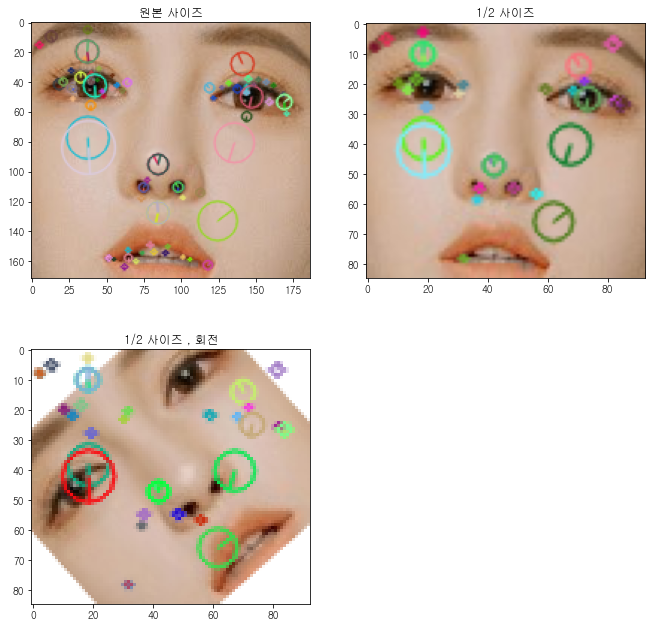

In [72]:
# ex) sift descriptor extraction
# 프린트해서, 벡터 크기나 모습을 봐야하고, 이진기술자들과 비교위해 차원수.
#https://intuitive-robotics.tistory.com/93
#https://bkshin.tistory.com/entry/OpenCV-27-%ED%8A%B9%EC%A7%95-%EB%94%94%EC%8A%A4%ED%81%AC%EB%A6%BD%ED%84%B0-%EA%B2%80%EC%B6%9C%EA%B8%B0-SIFT-SURF-ORB

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


import cv2
import numpy as np
from matplotlib import pyplot as plt
import time



img = cv2.imread("../data/face_model.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread("../data/face_model_small.jpg")
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

img3 = cv2.imread("../data/face_model_small_rotate.png")
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)


#SIFT 추출기 생성
sift = cv2.xfeatures2d.SIFT_create() #default

#keypoint 검출
start = time.time() 
keypoints,descriptor = sift.detectAndCompute(gray, None)
delta = time.time() - start
print("원본 keypoint 수 : ", len(keypoints))
print("SIFT 검출,DESCRIPTOR 추출시간: ",delta)

keypoints2,descriptor2 = sift.detectAndCompute(gray2, None)
print("1/2 사이즈 keypoint 수 : ", len(keypoints2))

keypoints3,descriptor3 = sift.detectAndCompute(gray3, None)
print("1/2 사이즈,회전  keypoint 수 : ", len(keypoints3))

#키포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #rich를 해야지 dominant orientation이 나온다.
img_draw2 = cv2.drawKeypoints(img2, keypoints2, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_draw3 = cv2.drawKeypoints(img3, keypoints2, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



# cv2.DRAW_MATCHES_FLAGS_DEFAULT : 특정한 위치만을 표현하는 작은 크기의 원

img_rgb= cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)#PLOT 출력위해
img_rgb2= cv2.cvtColor(img_draw2, cv2.COLOR_BGR2RGB)#PLOT 출력위해
img_rgb3= cv2.cvtColor(img_draw3, cv2.COLOR_BGR2RGB)#PLOT 출력위해



fig =plt.figure(figsize=(11,11))

plt.subplot(221),plt.title("원본 사이즈")# 2행 2열중 1번째
plt.imshow(img_rgb)

plt.subplot(222),plt.title("1/2 사이즈")# 2행 2열중 2번째
plt.imshow(img_rgb2)

plt.subplot(223),plt.title("1/2 사이즈 , 회전")# 2행 2열중 3번째
plt.imshow(img_rgb3)

plt.show()





In [73]:
#https://answers.opencv.org/question/12049/sift-octave-bug/ 옥타브설명

print("keypoint")
print(keypoints[0].pt,"각도: ",keypoints[0].angle,"\n반경: ",keypoints[0].size,"옥타브: ", keypoints[0].octave)
print("\ndescriptor: 특징벡터 차원",descriptor[0].size )
print(descriptor[0]) # 16칸 각각8벡터 0~160인것은 그래디언트 가중치가 더해져서.
print("옥타브: ",keypoints[0].octave&0xFF)# 0xFF 는 255. 굳이 왜 앤드연산을 하게 만들었나? keypoints객체가 sift말고도 사용되서

#그외에도  
# https://stackoverflow.com/questions/48385672/opencv-python-unpack-sift-octave

keypoint
(5.112600803375244, 15.530515670776367) 각도:  61.07196044921875 
반경:  4.365142345428467 옥타브:  14090496

descriptor: 특징벡터 차원 128
[  0.   0.   0.   2. 160.  29.   0.   0.  70.   0.   0.   1. 160.  59.
   2.  16. 160.   1.   0.   0.   2.   2.   1.  49.  80.   7.   4.   6.
   2.   0.   0.   7.   0.   0.   0.   0. 110.  59.   0.   0.  70.   3.
   0.   0. 160. 160.   3.  10. 160.  24.   0.   0.   8.  13.   2.  17.
  75.  13.   2.   3.   6.   0.   0.   1.   0.   0.   0.   0.  21.  11.
   0.   0.  21.   0.   0.   0. 116. 103.   7.  12. 160.  21.   0.   0.
  10.  24.   8.  35.  80.  22.   1.   1.   6.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   0.   1.
  39.   3.   0.   0.   0.   1.   1.   8.  28.  12.   0.   0.   1.   0.
   0.   1.]
옥타브:  0


### 2-2. SIFT 변형
---
SIFT는 구현이 까다롭고 개선할 여지가 많다.

개선한 새로운 기술자들.

### PCA - SIFT (Principal Component Analysis)
---

SIFT - 그레디언트 방향의 히스토그램 분포로 위치와 스케일 오차 강건성.

PCA SIFT - PCA 변환으로 강건성을 달성.

작동방법
1. SIFT DESCRIPTOR와 같이, dominant orientation을 구한다.

2. 키포인트를 중심으로 39x39 pixel 윈도우를 씌운다.

3. 윈도우 안의 화소의 dy, dx를 계산한다.

4. (39x39 윈도우의 화소들)x(2 미분값) = 3042 차원 특징벡터를 얻는다.

5. d=20 으로 두어 PCA를 사용하여, d 차원으로 축소, 특징벡터 x로 취한다.

결과, SIFT의 128차원 보다 낮아지고, 속도는 획기적으로 빨라진다.


### GLOH(Gradient Location-Orientation Histogram) ,  모양 콘텍스트(shape context)
---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/gloh.png" width="350" height="350">

##### GLOH
GLOH는 SIFT와 달리 원형 윈도우를 사용한다.

반지름은 안쪽부터 6,11,15로 각 원은 8등분씩이다.

총 17개 영역에서 각각 그레디언트 방향을 구하여, 16단계 양자화하여, 방향 히스토그램을 계산한다.

17 x 16 =272차 특징 벡터에서, PCA를 사용하여 128차원으로 축소할 수 있다.

##### 모양 콘텍스트
GLOH 처럼 원형 윈도우를 사용한다.

360도를 30도 간격으로 잘라, 12개로 양자화

반지름 r은 log(r)이 선형이 되도록, 2,4,6,8,12 5개 원 사용.

입력 영상에서 캐니 에지를 검출한다.

각 윈도우 칸 값은, 각 칸의 에지 개수로 설정.

5x12 = 60 차원의 특징벡터가 된다.

## 2-3. 이진 기술자
---

모바일 플랫폼이나, 비디오 영상의 물체 추적에서는 초당 30장의 영상을 처리해야하므로 계산효율이 매우 중요하다.

SIFT는 128차원의 특징벡터를 가지며, 한 키포인트당 128X4 = 512 바이트를 사용한다.

한 장당, 수천X512 바이트씩, 메가 바이트에 달하는 메모리 필요.

또한, 벡터 매칭시 유클리드 거리를 계산해야하니 연산시간이 많이 걸린다.

이진 기술자는 이러한 문제의식에서 출발.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/binary_descriptor.PNG" width="350" height="350">

빠른 매칭을 위해 특징 벡터를 이진열로 표현하는 것.

모든 이진 기술자는 특징점 주변의 두 화소를 비교 쌍으로 삼아, 명암값을 비교하여 0또는 1 이진값 생성.

매칭시에는 해밍 거리 이용.

EX) 11000100 과 10000101 은 해밍 거리는 2이다.

비교쌍을 어떻게 구성하는지에 따라 기술자가 다르다.

<br>
<br>

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/binary_descriptor2.PNG" width="650" height="450">


### BRIEF(Binary Robust Independent Elementary Features)
---

BRIEF는 가우시안 분포로부터 두 점을 발생시켜, 비교쌍을 만든다.

이런쌍을 256개 만들기 때문에, 특징벡터는 256비트이다.

하지만, 같은 크기의 가우시안에서 비교쌍을 생성하기에 스케일 변환, 회전 변환에 대처 X.


### ORB(Oriented FAST and Rotated BRIEF)
---

FAST 키포인트 탐지기와 BRIEF 디스크립터의 통합본이다.

ORB는 특징점의 방향에 따라 조사 패턴을 발생시키기에, 회전에는 불변.



### BRISK( Binary Robust Invariant Scalable Keypoints )
---
BRISK는 특징점의 스케일에 따라 정의되는 거리 조건을 만족하는 쌍만 골라 사용. 스케일 불변

특징점의 방향에 따라 회전한 60개점 사용. 회전 불변.


---

이진 기술자들은 특징점을 찾아주지는 못한다. 그래서, SIFT나 SURF로 먼저 특징점을 찾고 수행해야한다.




brief /   sift 검출, brief DESCRIPTOR 추출시간:  0.008676528930664062
brief keypoint 수 :  82

ORB /   FAST로 검출, brief DESCRIPTOR 추출시간:  0.0009202957153320312
ORB로 keypoint 수 :  100

brisk /   FAST로 검출, brisk DESCRIPTOR 추출시간:  0.0020029544830322266
ORB로 keypoint 수 :  41


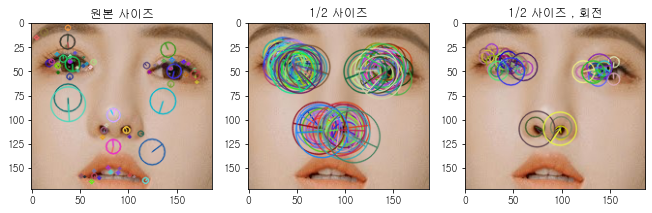

In [126]:
# ex) brief , orb , brisk

#brief: https://leechamin.tistory.com/323?category=857057
#orb : https://leechamin.tistory.com/325
#brisk: https://docs.opencv.org/3.4/de/dbf/classcv_1_1BRISK.html

# brief 에서는 sift로 검출 및 brief descriptor extraction
# orb 에서는 fast 검출, brief descriptor
# brisk 에서는 


from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

img = cv2.imread("../data/face_model.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#추출기 생성
sift = cv2.xfeatures2d.SIFT_create() #default
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

orb = cv2.ORB_create()
brisk = cv2.BRISK_create()

#keypoint 검출 및 brief
start = time.time() 

keypoints1 = sift.detect(gray, None)
descriptor1 = brief.compute(gray, keypoints1)

delta = time.time() - start
print("brief /   sift 검출, brief DESCRIPTOR 추출시간: ",delta)
print("brief keypoint 수 : ", len(keypoints1))


# ORB로 키포인트 / 디스크립터 찾기
start = time.time() 
keypoints2,descriptor2 = orb.detectAndCompute(img,None)
delta = time.time() - start
print("\nORB /   FAST로 검출, brief DESCRIPTOR 추출시간: ",delta)
print("ORB로 keypoint 수 : ", len(keypoints2))

# brisk로 키포인트 / 디스크립터 찾기
start = time.time() 
keypoints3,descriptor3 = brisk.detectAndCompute(img,None)
delta = time.time() - start
print("\nbrisk /   FAST로 검출, brisk DESCRIPTOR 추출시간: ",delta)
print("ORB로 keypoint 수 : ", len(keypoints3))



#이미지
#키포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints1, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #rich를 해야지 dominant orientation이 나온다.
img_draw2 = cv2.drawKeypoints(img, keypoints2, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_draw3 = cv2.drawKeypoints(img, keypoints3, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



# cv2.DRAW_MATCHES_FLAGS_DEFAULT : 특정한 위치만을 표현하는 작은 크기의 원

img_rgb= cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)#PLOT 출력위해
img_rgb2= cv2.cvtColor(img_draw2, cv2.COLOR_BGR2RGB)#PLOT 출력위해
img_rgb3= cv2.cvtColor(img_draw3, cv2.COLOR_BGR2RGB)#PLOT 출력위해



fig =plt.figure(figsize=(11,11))

plt.subplot(231),plt.title("원본 사이즈")# 2행 2열중 1번째
plt.imshow(img_rgb)

plt.subplot(232),plt.title("1/2 사이즈")# 2행 2열중 2번째
plt.imshow(img_rgb2)

plt.subplot(233),plt.title("1/2 사이즈 , 회전")# 2행 2열중 3번째
plt.imshow(img_rgb3)

plt.show()


#FAST 검출에서는 동심원이 많이 생긴다.

In [127]:

print("brief 특징벡터 차원 : " ,descriptor1[1].shape)#32는 주변의 256개의 쌍비교. 256/4byte
print("orb 특징벡터 차원 : " ,descriptor2.shape)
print("brisk 특징벡터 차원 : " ,descriptor3.shape) # 512개의 쌍

brief 특징벡터 차원 :  (47, 32)
orb 특징벡터 차원 :  (100, 32)
brisk 특징벡터 차원 :  (41, 64)


In [128]:
descriptor1[1][0] #이진수의 합

array([231, 249, 251,   1, 210, 196,  59,  50, 236,  57,  68,  87, 205,
       113, 254, 247, 168,   5, 165, 122, 243, 114,  52, 215,  50,  38,
        91, 132,   7, 151, 177,   8], dtype=uint8)

In [129]:
descriptor2[0]

array([ 63, 187, 127, 233, 238, 159, 255, 248, 239, 120, 254, 230,  91,
       221, 252, 113, 126, 221, 127, 255, 219, 179,  46, 244, 126, 249,
       167, 196, 127, 191, 240, 241], dtype=uint8)

In [139]:
import sys
print('메모리 비교')
print('sift ',descriptor[1].nbytes)
print('brief ',descriptor1[1][0].nbytes)
print('orb ',descriptor2[0].nbytes)
print('brisk ',descriptor3[0].nbytes)

메모리 비교
sift  512
brief  32
orb  32
brisk  64


<br>
<br>

## 5. PCA(Principal Component Analysis) 주성분 분석
---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/face1.png" width="550" height="550">

명암을 통해 특징점을 찾은 SIFT. 특징점의 수가 부족하다면? 눈에 많이 검출됬는데, 만약 눈을 더 크게 뜬다면?

얼굴 인식이 목적이라면, (SIFT, 이진 기술자, 텍스처)모두 마땅치 않다.

대신 화소값 자체를 특징으로 취한다면?

600 X 450 이미지면, 270,000 차원의 특징벡터가 만들어진다.

(그리고, 특징을 매칭 시키기위해서는 모든 이미지가 같은 사이즈여야 한다.)

차원이 너무 커서, 효과적을 줄이는 방법이 주성분 분석(PCA)

PCA는 D차원의 특징 벡터를 정보 손실을 최소로 유지하며, d(D < d)차원으로 줄여준다.

즉, 전체 특징을 요약해서 인식에 활용하자.

### 5-1. PCA 원리
---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca1.PNG" width="550" height="550">


PCA는 학습 집합을 이용하여, 변환 행렬 U를 추정한다.

U를 추정한후 , 입력벡터 X 와 U를 행렬곱하면, 출력벡터 y가 된다.

이때 U : d x D , x_t: D x 1 차원이다.

그래서 낮은 차원 d 인 벡터 y가 된다.

---
2차원 공간의 점을 u축(단위 벡터)에 투영하는 예시. (2차원을 1차원으로 축소하는 상황)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca2.PNG" width="150" height="150">
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca3.PNG" width="550" height="550">

(c)가 3중에서 가장 손실이 적다. 하지만, 최적이라 할 수 있을까?

#### 변환된 샘플들의 분산을 최대화 하는 단위 벡터를 찾아라!

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/covariance3.PNG" width="450" height="450">

분산이 가장 높은 축(단위 벡터)를 찾아서. 점들을 모으면, 점들은 겹치지 않고 하나의 축에 모이게 된다.

주성분 : 그 방향으로 데이터들의 분산이 가장 큰 방향벡터를 의미. 

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/covariance2.PNG" width="450" height="450">

이때 주성분은 공분산 행렬의 eigen vector 이다.

eigen vector는 데이터의 차원당 한개가 있다.

eigen value가 가장 높은 eigen vector를 구하면 된다.

공분산 행렬의 EIGEN VALUE가 가장 높을때, 변환된 데이터들의 분산이 큰것은 증명이 되었다.

```
공분산 행렬의 고유벡터는 데이터가 어떤 방향으로 분산되어있는지 알려줌.

고윳값은 고유벡터의 방향으로 얼마만큼 늘려있는지 알려줌.

고유벡터끼리는 서로 수직이다.

```

---
##### 공분산 행렬과  변환 행렬  U 구하는 과정.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/cov.PNG" width="300" height="300">

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/cov_matrix.jpg" width="400" height="300">

공분산 행렬은 2개의 컬럼데이터 X와 Y가 있을 때,

X축으로 퍼진정도, X와 Y축으로 같이 퍼진정도, Y축으로 퍼진 정도를 나타내준다.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca_ex1.PNG" width="250" height="250">

```
이 예시에서는 키(컬럼 1), 몸무게(컬럼 2)를 특징으로 가지는 2차원 특징 벡터들의 집합이다.]

D=2 이고, 줄이려는 차원은 d=1

이 훈련 샘플들을 바탕으로, 변환행렬 U를 추정하는 과정.
```

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca_ex2.PNG" width="450" height="450">

공분산 구현을 위해, x- (각 컬럼 평균) 으로 데이터 평균을 원점으로 옮긴다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca_ex3.PNG" width="550" height="550">

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca_ex3-2.PNG" width="550" height="550">

transpose(X) * X 를 통해 컬럼별로 dot product를 하게 해준다. 각 컬럼별로 공분산을 구하는 과정.(x-평균)(y-평균)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca_ex4.PNG" width="550" height="550">

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca_ex4-2.PNG" width="550" height="550">


마지막으로 샘플수 n으로 나눠주면 모집단의 공분산 행렬이 된다.

공분산 행렬은 D x D 차원이다.

차원 1당 EIGEN VECTOR가 한개. 공분산 행렬의 EIGEN VECTOR를 모아서, 변환 행렬 U를 만들 수 있다.

이때 d 차원으로 줄인다고하면, 변환 행렬은 d X D 차원이다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca_ex5.PNG" width="250" height="250">

공분산 행렬에서, 

EIGEN VALUE 가 큰 순으로 d개 만큼 뽑으면, 변환 행렬 U가 된다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca_ex6.PNG" width="200" height="200">

---
전체적인 알고리즘
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca_algo1.png" width="550" height="550">
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/pca_algo2.png" width="550" height="550">


원본 C1, C2 
 [[170  70]
 [150  45]
 [160  55]
 [180  60]
 [172  80]]
원본 사이즈:  (5, 2)

공분산 행렬: 
 [[107.84  85.2 ]
 [ 85.2  146.  ]] 

eigen values [ 39.60971195 214.23028805]
eig vecs
 [[-0.78055459 -0.62508761]
 [ 0.62508761 -0.78055459]]
두번째 eigen vector 취할시, 정보유지:  0.843957957979771 

변환 행렬 U
 [ 0.62508761 -0.78055459] 

1차원 사영된 데이터 
 [51.62607294 58.63818549 57.0835157  65.68249503 45.07070223]


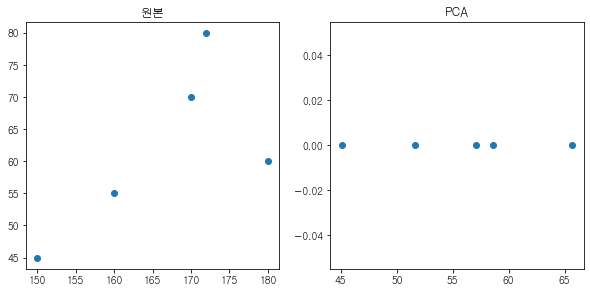

In [196]:
#ex) PCA 변환.
#https://www.youtube.com/watch?v=DUJ2vwjRQag
#공분산: https://junpyopark.github.io/Introduction_to_Numpy/

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import numpy as np
from matplotlib import pyplot as plt


D = np.array([[170,70],[150,45],[160,55],[180,60],[172,80]])
print('원본 C1, C2 \n',D)
print('원본 사이즈: ',D.shape)

#공분산 행렬
data_cov=np.cov(np.transpose(D))*(D.shape[0]-1)/D.shape[0]
print("\n공분산 행렬: \n",data_cov,'\n')

#공분산 행렬, 고유 벡터 
eig_vals, eig_vecs=np.linalg.eig(data_cov)
print("eigen values",eig_vals)
print("eig vecs\n",eig_vecs)
data_remain = eig_vals[1]/np.sum(eig_vals)
print("두번째 eigen vector 취할시, 정보유지: ",data_remain ,'\n')
print("변환 행렬 U\n",eig_vecs[1],'\n')

#데이터 사영
projected = D.dot(eig_vecs[1])
print('1차원 사영된 데이터 \n',projected)

fig =plt.figure(figsize=(10,10))

plt.subplot(221),plt.title("원본")# 2행 2열중 1번째
plt.scatter(D[:,0],D[:,1])

plt.subplot(222),plt.title("PCA")# 2행 2열중 2번째
plt.scatter(projected,np.zeros((projected.size,1)))
plt.show()


## 5-2. 얼굴인식: Eigen Face

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/mean_face1.png" width="650" height="450">
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/mean_face2.png" width="500" height="500">


만약 192x168의 같은 크기의 얼굴 사진을 가지고 있을때,

평균 얼굴을 구하면, 왜 얼굴 모양을 띌까. 

얼굴 사진의 사이즈가 같고, 비슷한 위치에 눈코입이 있는 사진들이라서 그렇다.

---

얼굴사진을 PCA를 통해 압축하는 방법을 생각해보자.

작은 차원의 특징 벡터로 압축되면, 거리를 비교해 인식도 할 수 있다.

변환 행렬을 이루는 고유 벡터를, EIGEN FACE라고 한다.

### Eigen Face구하기
---

##### 1. 각 영상 화소를 특징벡터로 만든다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/eigenface1.png" width="550" height="550">

이전과 다르게 모든 화소가 특징벡터의 차원이 된다.

즉, 특징벡터의 차원은 가로X세로 = M x N = D = 32,256 이다.

<br>

##### 2. 각 영상별 화소의 평균을 구하고, 평균 벡터를 구한다. 그리고 각 벡터에서 평균을 빼준다.

(평균 벡터 그리기)

<br>

##### 3. 공분산 행렬 구하기

공분산 행렬의 차원은, D x D = 32,256 * 32,256 이 된다.

<br>

##### 4. 공분산 행렬의 고유 벡터와 고유값을 계산한다. 그리고 d개 만큼 고유벡터를 추출한다.

이때, 고유벡터가 eigen face다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/eigenface.png" width="450" height="450">

고유벡터가 얼굴 형태를 띄는 이유는?

공분산 행렬의 eigen vector가 . 얼굴 영상의 많은 데이터와 크기나 방향이 같아서?

<br>

##### 5. U 변환 행렬을 통해, 얼굴 이미지를 압축한다.

```
d = 6으로 압축했을 때 (샘플이미지가 6개라서.)

ex) y1 = (-268.3 , 76.52, -30.31, 51.29, 119.69, 0.0) 

```

<br>
<br>

#### 얼굴 복원
---
의사역행렬을 이용해, x' 으로 복원할 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/inverse.png" width="200" height="200">

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/inverse1.png" width="650" height="450">

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/mean_face1.png" width="650" height="450">

만일 수십에서 수백장 영상으로 실험하면, d를 높일수 있어서 손실을 줄여서 압축 할 수 있다.

<br>
<br>

#### 얼굴 인식
----
y1~ y6 까지는 압축된 샘플 데이터.

y_test도 마찬가지로 압축 했을때.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/face_distance.png" width="800" height="300">

유클리드 거리가 가장 작은 백터를 인식






#### 계산 효율 높히는 방법
---




In [ ]:
# ex) eigen face



## 4. 텍스처

텍스처란 일정한 패턴의 반복이다.

새의 하얀색 털. 새 주위의 거친 잔디.

나무 숲의 텍스처, 꽃 무리 텍스처

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture1.png" width="550" height="550">

##### 텍스처의 활용
---

텍스처의 특징 (텍스처 기술자? )은 영역을 인식하는데 사용할 수 있다.

8장의 SVM과 같은 분류기에 입력하여 물체를 인식하거나

영상분할에도 활용 할 수 있다.


###### 명암이나 컬러를 특징으로  영상분할을 한다면?

새 영상에서 풀밭을 분할할 때. 

명암이나 컬러를 특징으로 분할하면, 매우 작은 영역으로 <span style="color:blue">과분화</span> 될것이다.(구분점이 많아서.)

텍스처 특징을 사용한다면, 풀밭 전체를 하나의 영역으로 분할할 수 있는 가능성이 생긴다. 



##### 텍스처를 분석하는 방법.
---

- 구조적 방법 : texel 이라는 기본단위를 추출한 후, 텍셀과 공간적인 관계를 추출한다.

ex) 꽃을 texel 로 추출한뒤, 공간적인 관계 추출하기.

이 작업은 어려워서 

- 통계적 방법 을 사용한다.


## 4-1. 전역 기술자
---

이웃 관계 보지않고, 영역을 전체 계산해서 전역기술자.


### 에지 정보에서 추출한 texture 기술자.
---

깃털과 풀밭을 비교해보면 빽빽한 차이와 방향이 다름을 알 수 있다. 

그래서, 에지의 밀집도와 방향을 이용해 두 부분을 구별하는 특징이 될 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture2.png" width="550" height="550">

T_edge 가 텍스처 기술자이다.

busy 특징은 영역에 있는 에지 화소의 비율.

mag(i): 에지 화소의 강도를 q단계 양자화 하여 구한 히스토그램 : q차원

dir(i): 8방향 양자화된 에지방향 히스토그램. : 8차원


### 명암 히스토그램을 이용한 texture 기술자.
---


해당 영역을 구성하는 명암 히스토그램을 이용하는 방법.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture3.png" width="200" height="200">

m이 중심 명암값(명암의 가중평균)일 때

r차 모멘트는 중심 명암과의 차이의 가중평균의 r승 한것.

이에따라, 텍스처 기술자를 정의하면

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture4.png" width="300" height="500">

smooth : 부드러운 정도 , skew: 밝은 쪽 어두운쪽 치우친 정도

uniform: 균일한 정도 , entropy: 영역변화가 얼마나 심한지.


- 한계:

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture5.png" width="300" height="500">

이 처럼, 명암 히스토그램이 같은 세 영역은 분별력이 없다.

<br>
<br>

## 4-2. 지역 관계 기술자
---

이웃 화소 사이의 관계를 규정하고, 그들이 형성하는 패턴을 표현하는 연산을 가진 기술자가 필요하다.

텍스처 기술자를 추출하는 도구에는 <동시 발생 행렬(co-occurence matrix)>, <지역 이진 패턴(Local binary pattern)>이 있다.

<br>

### 동시 발생 행렬(co-occurence matrix)
---
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture6.png" width="400" height="600">

동시 발생 행렬은 화소 쌍을 대상으로 조사하여 정의한다.

이 예제는 오른쪽 쌍과의 관계로 정의.

- 정규 동시 발생 행렬

전체 화소수로 나누어 정의. 이를 이용해 기술자를 찾는다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture7.png" width="500" height="600">

기술자

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture8.png" width="500" height="700">


동시 발생행렬의 이웃을 정의하는 것이 중요하다.

[Zucker80]에서는 카이제곱 통계량을 통해 이웃관계를 찾아낸다.

<br>

### 지역 이진 패턴(Local binary pattern)
---
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture9.png" width="150" height="200">

이 잔디에서, 일부 영역을 뗴어 명암 영상으로 변환한다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture10.png" width="500" height="700">

주변 8이웃과의 대소비교를 통해 이진열로 나타낸다.

그러면, 256차원의 특징벡터가 된다.

(?? 이웃관계만 정의해도 텍스쳐 인가? 특징점이랑 비슷한 개념인가?)

- 조명변화에 불변

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture11.png" width="500" height="700">

- 크기 변환에 불변

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina4/resource/texture12.png" width="500" height="700">

---
##### LBP의 활용
조명변화, 크기 변환에 대응하는 특성때문에 인식하는 용도에 많이 사용된다.

- LBP를 이용한 얼굴인식 방법 [Ahonen2006]

- LBP와 HOG(Histogram of gradients) 기술자와 결합하여 가림있는 상황에서 사람검출. [Wang2009]
